In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loadind the data from power_actual file, weather_actual file & weather_forcast file 

pow_act = pd.read_csv('C:\\Users\\Pratap\\Desktop\\New folder\\power_actual.csv')
wea_act = pd.read_csv('C:\\Users\\Pratap\\Desktop\\New folder\\weather_actuals.csv')
wea_for = pd.read_csv('C:\\Users\\Pratap\\Desktop\\New folder\\weather_forecast.csv')

In [3]:
pow_act.shape

(70080, 5)

In [4]:
wea_act.shape

(13619, 31)

In [5]:
wea_for.shape

(648, 31)

# Distribute the given data into train and test data

In [6]:
train_data = pd.concat([pow_act,wea_act],axis=1)
train_data.shape

(70080, 36)

In [7]:
train_data.head(5)

,Unnamed: 0,datetime,ghi,gti,power,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,...,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,0,2017-10-01 00:00:00,0.0,0.0,0.0,0.0,1.0,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,...,-9999.0,-9999.0,-9999.0,rain,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
1,1,2017-10-01 00:15:00,0.0,0.0,0.0,1.0,1.0,2017-09-30 19:30:00,2017-10-01 01:00:00,0.0,...,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
2,2,2017-10-01 00:30:00,0.0,0.0,0.0,2.0,1.0,2017-09-30 20:30:00,2017-10-01 02:00:00,0.0,...,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
3,3,2017-10-01 00:45:00,0.0,0.0,0.0,3.0,1.0,2017-09-30 21:30:00,2017-10-01 03:00:00,0.0,...,-9999.0,-9999.0,-9999.0,rain,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
4,4,2017-10-01 01:00:00,0.0,0.0,0.0,4.0,1.0,2017-09-30 22:30:00,2017-10-01 04:00:00,0.0,...,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16


In [8]:
train_data = train_data.drop('Unnamed: 0',1)

In [9]:
# finding the null values and its percentage and then concat both

total=train_data.isnull().sum().sort_values(ascending=False)
percentage = (total*100/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percentage],axis=1,keys=['total_missing_values_per_row','percentage'])
print(missing_data)

                      total_missing_values_per_row  percentage
apparent_temperature                         56461   80.566495
cloud_cover                                  56461   80.566495
datetime                                         0    0.000000
datetime_local                               56461   80.566495
datetime_utc                                 56461   80.566495
dew_point                                    56461   80.566495
fctcode                                      66336   94.657534
ghi                                          35040   50.000000
gti                                          35040   50.000000
heat_index                                   66336   94.657534
humidity                                     56461   80.566495
icon                                         56461   80.566495
ozone                                        56461   80.566495
plant_id                                     56461   80.566495
pop                                          66336   94

C:\Users\Pratap\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


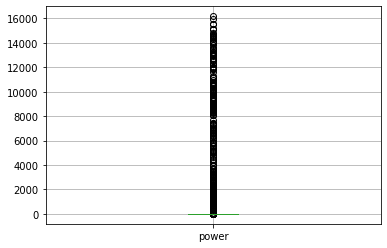

In [10]:
# Outlier Detection for power column
import matplotlib.pyplot as plt
import seaborn as sns

boxplot = train_data.boxplot(column='power')

In [11]:
cols = ['snow','wind_chill','pop','fctcode','heat_index','precip_accumulation','qpf','precip_type','humidity','summary','uv_index','icon']
#for col in cols:
    #train_data[cols] = mode_imputer.fit_transform(train_data[[col]].values)
train_data[cols]=train_data[cols].fillna(train_data[cols].mode().iloc[0])

In [12]:
train_data['humidity'].isnull().sum()

0

In [13]:
Q1 = train_data.quantile(0.25)
Q3 = train_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ghi                       0.000
gti                       0.000
power                     5.540
plant_id                  0.000
cloud_cover               0.410
apparent_temperature     17.270
temperature              14.000
humidity                  0.000
dew_point                13.750
wind_bearing            214.000
wind_speed                1.710
wind_chill                0.000
wind_gust                 3.525
heat_index                0.000
pressure                 15.990
qpf                       0.000
uv_index                  0.000
snow                      0.000
pop                       0.000
fctcode                   0.000
ozone                    43.900
precip_accumulation       0.000
precip_intensity          0.000
precip_probability        0.000
visibility               12.550
dtype: float64


-3.4383482774832568


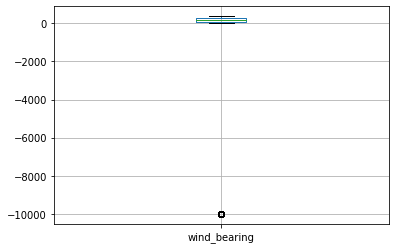

In [14]:
print(train_data['wind_bearing'].skew())
train_data['wind_bearing'].describe()
boxplot = train_data.boxplot(column='wind_bearing')
plt.show()

In [15]:
# tratment on outliers of wind_bearing
print(train_data['wind_bearing'].quantile(0.10))
print(train_data['wind_bearing'].quantile(0.90))

14.0
327.0


In [16]:
train_data['wind_bearing'] = np.where(train_data['wind_bearing'] <14.0,14.0,train_data['wind_bearing'])
train_data['wind_bearing'] = np.where(train_data['wind_bearing'] >327.0, 327.0,train_data['wind_bearing'])
print(train_data['wind_bearing'].skew())

0.013400547195342413


In [17]:
train_data['wind_bearing']=train_data['wind_bearing'].fillna(train_data['wind_bearing'].median())

In [18]:
# filling missing values of train data with mean value
cols1 = ['wind_speed','cloud_cover','apparent_temperature','visibility','precip_probability','wind_gust','ozone','temperature','dew_point','pressure','precip_intensity']
train_data[cols1]=train_data[cols1].fillna(train_data[cols].median().iloc[0])

In [19]:
train_data.isnull().sum()

datetime                    0
ghi                     35040
gti                     35040
power                       0
plant_id                56461
datetime_utc            56461
datetime_local          56461
cloud_cover                 0
apparent_temperature        0
temperature                 0
humidity                    0
dew_point                   0
wind_bearing                0
wind_speed                  0
wind_chill                  0
wind_gust                   0
heat_index                  0
pressure                    0
qpf                         0
uv_index                    0
snow                        0
pop                         0
fctcode                     0
ozone                       0
precip_accumulation         0
precip_intensity            0
precip_probability          0
precip_type                 0
visibility                  0
sunrise                 56461
sunset                  56461
icon                        0
summary                     0
updated_at

In [20]:
# copy the date from datetime column to datetime_local
a = train_data['datetime'].iloc[13619:]
train_data['datetime_local'] = train_data['datetime_local'].fillna(a)
print(train_data['datetime_local'].iloc[13619:])
train_data['sunrise'] = train_data['sunrise'].fillna(a)
train_data['sunset'] = train_data['sunset'].fillna(a)

13619    2018-02-19 20:45:00
13620    2018-02-19 21:00:00
13621    2018-02-19 21:15:00
13622    2018-02-19 21:30:00
13623    2018-02-19 21:45:00
                ...         
70075    2019-09-30 22:45:00
70076    2019-09-30 23:00:00
70077    2019-09-30 23:15:00
70078    2019-09-30 23:30:00
70079    2019-09-30 23:45:00
Name: datetime_local, Length: 56461, dtype: object


In [21]:
train_data['datetime_local']=pd.to_datetime(train_data['datetime_local'],format='%Y-%m-%d  %H:%M:%S')

train_data['datetime_local_year']=train_data['datetime_local'].dt.year
train_data['datetime_local_month']=train_data['datetime_local'].dt.month
train_data['datetime_local_day']=train_data['datetime_local'].dt.day


# distribute the sunrise column into month and year
train_data['sunrise']=pd.to_datetime(train_data['sunrise'],format='%Y-%m-%d  %H:%M:%S')

train_data['sunrise_year']=train_data['sunrise'].dt.year
train_data['sunrise_month']=train_data['sunrise'].dt.month
train_data['sunrise_day']=train_data['sunrise'].dt.day
train_data['sunrise_hour']=train_data['sunrise'].dt.hour
train_data['sunrise_minute']=train_data['sunrise'].dt.minute
train_data['sunrise_second']=train_data['sunrise'].dt.second

# distribute the sunset column into month and year
train_data['sunset']=pd.to_datetime(train_data['sunset'],format='%Y-%m-%d  %H:%M:%S')

train_data['sunset_year']=train_data['sunset'].dt.year
train_data['sunset_month']=train_data['sunset'].dt.month
train_data['sunset_day']=train_data['sunset'].dt.day
train_data['sunset_hour']=train_data['sunset'].dt.hour
train_data['sunset_minute']=train_data['sunset'].dt.minute
train_data['sunset_second']=train_data['sunset'].dt.second

In [22]:
# Droping the dates column
train_data = train_data.drop(['datetime','datetime_local','datetime_utc','sunrise','sunset','updated_at','ghi','gti','plant_id'],1)

In [23]:
train_data.isnull().sum()

power                   0
cloud_cover             0
apparent_temperature    0
temperature             0
humidity                0
dew_point               0
wind_bearing            0
wind_speed              0
wind_chill              0
wind_gust               0
heat_index              0
pressure                0
qpf                     0
uv_index                0
snow                    0
pop                     0
fctcode                 0
ozone                   0
precip_accumulation     0
precip_intensity        0
precip_probability      0
precip_type             0
visibility              0
icon                    0
summary                 0
datetime_local_year     0
datetime_local_month    0
datetime_local_day      0
sunrise_year            0
sunrise_month           0
sunrise_day             0
sunrise_hour            0
sunrise_minute          0
sunrise_second          0
sunset_year             0
sunset_month            0
sunset_day              0
sunset_hour             0
sunset_minut

In [24]:
train_data.shape

(70080, 40)

In [25]:
data1 = pd.get_dummies(data=train_data,columns=['icon','summary','precip_type'])

In [26]:
data1.shape

(70080, 66)

Split the data1_train data into train and test data

In [27]:
from sklearn.model_selection import train_test_split
# Split the data into trainning and testing data
X = data1.drop('power',1)
y = data1['power']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_clf = RandomForestRegressor(random_state=0)

# Fit the model on train data
rf_clf.fit(X_train,y_train)

# predict on test data
y_pred = rf_clf.predict(X_test)

C:\Users\Pratap\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [29]:
train_acc = rf_clf.score(X_train,y_train)
print("Training score: %.2f " % train_acc)

Training score: 0.98 


In [30]:
# accuarcy of the model on test data
test_acc = rf_clf.score(X_test,y_test)
print("Testing score: %.2f " % test_acc)

Testing score: 0.91 


In [31]:
from sklearn.metrics import mean_absolute_error
# MAE calculation
mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error : ',mae)

Mean Absolute Error :  8.256441027032881


In [32]:
from sklearn.metrics import mean_squared_error

# Code starts here
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print('Root Mean Squared Error : ',rmse)

Root Mean Squared Error :  156.47321930922945


In [33]:
from sklearn.metrics import r2_score

# Code starts here

# R-squared calculation
rsquared = r2_score(y_test, y_pred)
print('R Square :',rsquared)

R Square : 0.9110404136700367


Test Data

In [34]:
test_data = wea_for

In [35]:
test_data.head()

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,...,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,0,1,2019-09-30 18:30:00,2019-10-01 00:00:00,0.35,26.41,26,1,22.01,101,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
1,1,1,2019-09-30 19:30:00,2019-10-01 01:00:00,0.43,25.95,25,1,22.06,105,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
2,2,1,2019-09-30 20:30:00,2019-10-01 02:00:00,0.48,25.46,25,1,22.06,106,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
3,3,1,2019-09-30 21:30:00,2019-10-01 03:00:00,0.49,24.80,24,1,21.87,106,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
4,4,1,2019-09-30 22:30:00,2019-10-01 04:00:00,0.49,23.99,23,1,21.53,100,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38


In [36]:
test_data = test_data.drop('Unnamed: 0',1)

In [37]:
total=test_data.isnull().sum().sort_values(ascending=False)
percentage = (total*100/test_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percentage],axis=1,keys=['total_missing_values_per_row','percentage'])
print(missing_data)

                      total_missing_values_per_row  percentage
apparent_temperature                             0    0.000000
cloud_cover                                      0    0.000000
datetime_local                                   0    0.000000
datetime_utc                                     0    0.000000
dew_point                                        0    0.000000
fctcode                                        648  100.000000
heat_index                                     648  100.000000
humidity                                         0    0.000000
icon                                             0    0.000000
ozone                                            0    0.000000
plant_id                                         0    0.000000
pop                                            648  100.000000
precip_accumulation                            648  100.000000
precip_intensity                                 0    0.000000
precip_probability                               0    0

C:\Users\Pratap\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
cols11 =['snow','wind_chill','pop','fctcode','heat_index','precip_accumulation','qpf','precip_type','humidity','summary','uv_index','icon']
test_data[cols11]=test_data[cols11].fillna(train_data[cols11].mode().iloc[0])

In [39]:
Q1 = test_data.quantile(0.25)
Q3 = test_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

plant_id                  0.0000
cloud_cover               0.1100
apparent_temperature      8.1250
temperature               8.0000
humidity                  1.0000
dew_point                 4.5625
wind_bearing            221.7500
wind_speed                0.9825
wind_chill                0.0000
wind_gust                 1.6800
heat_index                0.0000
pressure                  2.5125
qpf                       0.0000
uv_index                  3.0000
snow                      0.0000
pop                       0.0000
fctcode                   0.0000
ozone                     3.3000
precip_accumulation       0.0000
precip_intensity          0.0000
precip_probability        0.0000
visibility                0.0000
dtype: float64


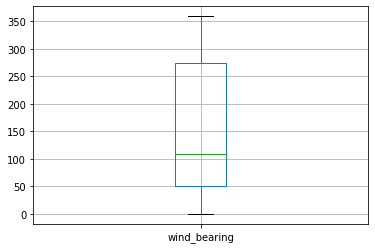

In [40]:
test_data['wind_bearing'].describe()
boxplot = test_data.boxplot(column='wind_bearing')
plt.show()

In [41]:
print(test_data['wind_bearing'].quantile(0.10))
print(test_data['wind_bearing'].quantile(0.90))

18.700000000000003
335.0


In [42]:
test_data['wind_bearing'] = np.where(test_data['wind_bearing'] <18.700000000000003,18.700000000000003,test_data['wind_bearing'])
test_data['wind_bearing'] = np.where(test_data['wind_bearing'] >335.0, 335.0,test_data['wind_bearing'])
print(test_data['wind_bearing'].skew())

0.6956220453176032


In [43]:
test_data['wind_bearing']=test_data['wind_bearing'].fillna(test_data['wind_bearing'].median())

In [44]:
cols3 = ['wind_speed','cloud_cover','apparent_temperature','visibility','precip_probability','wind_gust','ozone','temperature','dew_point','pressure','precip_intensity']
test_data[cols3]=test_data[cols3].fillna(test_data[cols3].median().iloc[0])

In [45]:
test_data.isnull().sum()

plant_id                0
datetime_utc            0
datetime_local          0
cloud_cover             0
apparent_temperature    0
temperature             0
humidity                0
dew_point               0
wind_bearing            0
wind_speed              0
wind_chill              0
wind_gust               0
heat_index              0
pressure                0
qpf                     0
uv_index                0
snow                    0
pop                     0
fctcode                 0
ozone                   0
precip_accumulation     0
precip_intensity        0
precip_probability      0
precip_type             0
visibility              0
sunrise                 0
sunset                  0
icon                    0
summary                 0
updated_at              0
dtype: int64

In [46]:
# distribute the datetime_local column into month and year
test_data['datetime_local']=pd.to_datetime(test_data['datetime_local'],format='%Y-%m-%d  %H:%M:%S')

test_data['datetime_local_year']=test_data['datetime_local'].dt.year
test_data['datetime_local_month']=test_data['datetime_local'].dt.month
test_data['datetime_local_day']=test_data['datetime_local'].dt.day


# distribute the sunrise column into month and year
test_data['sunrise']=pd.to_datetime(test_data['sunrise'],format='%Y-%m-%d  %H:%M:%S')

test_data['sunrise_year']=test_data['sunrise'].dt.year
test_data['sunrise_month']=test_data['sunrise'].dt.month
test_data['sunrise_day']=test_data['sunrise'].dt.day
test_data['sunrise_hour']=test_data['sunrise'].dt.hour
test_data['sunrise_minute']=test_data['sunrise'].dt.minute
test_data['sunrise_second']=test_data['sunrise'].dt.second

# distribute the sunset column into month and year
test_data['sunset']=pd.to_datetime(test_data['sunset'],format='%Y-%m-%d  %H:%M:%S')

test_data['sunset_year']=test_data['sunset'].dt.year
test_data['sunset_month']=test_data['sunset'].dt.month
test_data['sunset_day']=test_data['sunset'].dt.day
test_data['sunset_hour']=test_data['sunset'].dt.hour
test_data['sunset_minute']=test_data['sunset'].dt.minute
test_data['sunset_second']=test_data['sunset'].dt.second

In [47]:
test_data = test_data.drop(['datetime_local','datetime_utc','sunrise','sunset','updated_at','plant_id'],1)

In [48]:
test_data.shape

(648, 39)

In [49]:
test_data = pd.get_dummies(data=test_data,columns=['icon','summary','precip_type'])

In [50]:
test_data.shape

(648, 47)

In [51]:
data1.columns

Index(['power', 'cloud_cover', 'apparent_temperature', 'temperature',
       'humidity', 'dew_point', 'wind_bearing', 'wind_speed', 'wind_chill',
       'wind_gust', 'heat_index', 'pressure', 'qpf', 'uv_index', 'snow', 'pop',
       'fctcode', 'ozone', 'precip_accumulation', 'precip_intensity',
       'precip_probability', 'visibility', 'datetime_local_year',
       'datetime_local_month', 'datetime_local_day', 'sunrise_year',
       'sunrise_month', 'sunrise_day', 'sunrise_hour', 'sunrise_minute',
       'sunrise_second', 'sunset_year', 'sunset_month', 'sunset_day',
       'sunset_hour', 'sunset_minute', 'sunset_second', 'icon_clear-day',
       'icon_clear-night', 'icon_cloudy', 'icon_fog', 'icon_partly-cloudy-day',
       'icon_partly-cloudy-night', 'icon_rain', 'icon_wind',
       'summary_Breezy and Foggy', 'summary_Clear', 'summary_Foggy',
       'summary_Humid', 'summary_Humid and Foggy',
       'summary_Humid and Mostly Cloudy', 'summary_Humid and Overcast',
       'summary_Hum

In [52]:
test_data[['icon_fog','icon_rain','icon_wind','precip_type_-9999','summary_Rain and Humid','summary_Rain','summary_Possible Light Rain and Humid','summary_Possible Light Rain','summary_Possible Drizzle and Humid','summary_Possible Drizzle','summary_Light Rain and Humid','summary_Light Rain','summary_Humid and Partly Cloudy','summary_Humid and Overcast','summary_Humid and Foggy','summary_Humid',
'summary_Foggy','summary_Breezy and Foggy']]= data1[['icon_fog','icon_rain','icon_wind','precip_type_-9999','summary_Rain and Humid','summary_Rain','summary_Possible Light Rain and Humid','summary_Possible Light Rain','summary_Possible Drizzle and Humid','summary_Possible Drizzle','summary_Light Rain and Humid','summary_Light Rain','summary_Humid and Partly Cloudy','summary_Humid and Overcast','summary_Humid and Foggy','summary_Humid',
'summary_Foggy','summary_Breezy and Foggy']]

In [53]:
test_data.shape

(648, 65)

In [54]:
# predict on test data
y_pred1 = rf_clf.predict(test_data)

In [55]:
y_pred1 = pd.DataFrame(y_pred1)

In [56]:
y_pred1.to_csv('C:\\Users\\Pratap\\Desktop\\New folder\\power.csv')